<a href="https://colab.research.google.com/github/supatsara2002/bsc_dpdm22/blob/main/midterm_dpdm22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## การเตรียมข้อมูลประกอบด้วย กำจัด outlier, แก้ missing, normalization, one-hot-encoder และ อื่นๆ ที่นักศึกษาเห็นว่าเหมาะสม

# 1 ทำนายราคาบ้าน 10 คะแนน
เตรียมข้อมูลเพื่อทำนายราคาบ้าน ราคาประเมินบ้าน และ คะแนนทรัพย์ จาก [google drive](https://drive.google.com/drive/folders/1uIcUFY1yldIq-A3wijh2n2N6az-EljIe?usp=sharing) โดยข้อมูลที่เตรียมต้องประกอบด้วย columns ต่อไปนี้

* ```'renovate','number_of_rai','number_of_ngan','number_of_va','number_of_story','number_of_bedroom','number_of_bathroom','direction','furniture','usable_area','number_of_parking', 'sell_price'``` จากตาราง "คำตอบนักประเมิน(ID)"

* ```จำนวน 7-11 และ โรงเรียน ในรัศมี 200,500,1000,2000 เมตร (ตั้งชื่อ d200-7/11','d500-7/11',...,'d2000-7/11' แบะ ;d200-school','d500-school',...,'d2000-school')``` จากตาราง "7-eleven.json" และ "school.json"

* ```ประเมินราคาซื้อขาย และ คะแนนทรัพย์ (ตั้งชื่อ 'estimator' และ 'score')``` จากตาราง คำตอบนักประเมิน(ID) โดยราคาประเมินกับคะแนนทรัพย์ อ้างอิงของนักประเมิน ID=01 คนเดียว

In [228]:
import pandas as pd
import numpy as np
from pandas.io import json

In [229]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## import file  

In [230]:
#คำตอบนักประเมิน(ID)
link1 = 'https://docs.google.com/spreadsheets/d/1e5O1uvod6T-Ry4q5vb8AN3GuuMPagrdB/export?format=xlsx'
detachedhouse = pd.read_excel(link1,sheet_name='บ้าน')

In [231]:
#Data House
link2 = 'https://docs.google.com/spreadsheets/d/1WnXqivn3E8JNRGGdORlKvPtRM3M6kM-H/export?format=xlsx'
H1 = pd.read_excel(link2,sheet_name='บ้านมือ1')
H2 = pd.read_excel(link2,sheet_name='บ้านมือ2')

In [232]:
#7-eleven.json
with open('/content/drive/MyDrive/bsc_DPDM_data/MIDterm/7-eleven.json') as json_file:
  seven_eleven = json.loads(json_file.read())

In [233]:
#school.json
with open('/content/drive/MyDrive/bsc_DPDM_data/MIDterm/school.json') as json_file:
  school = json.loads(json_file.read())

##คำตอบนักประเมิน(ID)

In [234]:
detachedhouse['second_hand'] = 'บ้านมือ 1'

In [235]:
detachedhouse.head()

,ID ผู้ประเมิน,post id,ID,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,second_hand
0,1.0,https://nayoo.co/khonkaen/posts/1,1.0,บ้านเดี่ยว,มั่นใจ,390000.0,600000.0,"3,000-30,000 บาท/ตารางวา",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,บ้านมือ 1
1,2.0,https://nayoo.co/khonkaen/posts/1,1.0,บ้านเดี่ยว,มั่นใจ,390000.0,1300000.0,"ราคาเสนอขาย 1,000 - 3,000 บาท / ตารางวา",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,บ้านมือ 1
2,1.0,https://nayoo.co/khonkaen/posts/4,4.0,บ้านเดี่ยว,มั่นใจ,930000.0,750000.0,"2,000-10,000 บาท/ตารางวา",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,บ้านมือ 1
3,2.0,https://nayoo.co/khonkaen/posts/4,4.0,บ้านเดี่ยว,มั่นใจ,930000.0,1000000.0,"ราคาเสนอขาย 3,000 - 5,000 บาท/ตารางวา",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,บ้านมือ 1
4,1.0,https://nayoo.co/khonkaen/posts/16,16.0,บ้านเดี่ยว,มั่นใจ,2994000.0,2800000.0,"2,000-10,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,บ้านมือ 1


###แก้ Missing

In [236]:
detachedhouse.isnull().any()

ID ผู้ประเมิน                     False
post id                           False
ID                                False
property_type                     False
ความมั่นใจในการเมินราคาทรัพย์     False
ราคาทรัพย์                         True
ประเมินราคาซื้อ-ขาย                True
ปัจจัยในการประเมินราคาซื้อ-ขาย     True
เหตุผลไม่มั่นใจราคาประเมิน         True
ให้คะแนนทรัพย์                     True
second_hand                       False
dtype: bool

In [237]:
# ราคาทรัพย์, ประเมินราคาซื้อ-ขาย
# เลือก Dropna เนื่องจากราคาทรัพย์และประเมินราคาซื้อ-ขาย ไม่สามารถแทนด้วยค่าเฉลี่ยหรือแทนด้วย 0 ได้ เพราะจะทำให้ความหมายเปลี่ยน
detachedhouse.dropna(subset=['ราคาทรัพย์'],inplace=True)
detachedhouse.dropna(subset=['ประเมินราคาซื้อ-ขาย'],inplace=True)

In [238]:
# ปัจจัยในการประเมินราคาซื้อ-ขาย, เหตุผลไม่มั่นใจราคาประเมิน, ให้คะแนนทรัพย์
# fillna ด้วยไม่มีฐานข้อมูล เนื่องจากถ้าเหตุผลไม่มั่นใจราคาประเมินไม่มีฐานข้อมูล(ก็คือกรอกไม่มั่นใจ) ทำให้ปัจจัยในการประเมินราคาซื้อ-ขายและให้คะแนนทรัพย์ไม่มีข้อมูลไปด้วย
detachedhouse['ปัจจัยในการประเมินราคาซื้อ-ขาย'] = detachedhouse['ปัจจัยในการประเมินราคาซื้อ-ขาย'].fillna('ไม่มีฐานข้อมูล') 
detachedhouse['ให้คะแนนทรัพย์'] = detachedhouse['ให้คะแนนทรัพย์'].fillna('ไม่มีฐานข้อมูล') 
# fillna ด้วยไม่มี เนื่องจากถ้ากรอกว่ามั่นใจจะทำให้คอลัมน์เหตุผลไม่มั่นใจราคาประเมินไม่มีข้อมูลของการไม่มั่นใจ
detachedhouse['เหตุผลไม่มั่นใจราคาประเมิน'] = detachedhouse['เหตุผลไม่มั่นใจราคาประเมิน'].fillna('ไม่มี') 


In [239]:
detachedhouse.isnull().any()

ID ผู้ประเมิน                     False
post id                           False
ID                                False
property_type                     False
ความมั่นใจในการเมินราคาทรัพย์     False
ราคาทรัพย์                        False
ประเมินราคาซื้อ-ขาย               False
ปัจจัยในการประเมินราคาซื้อ-ขาย    False
เหตุผลไม่มั่นใจราคาประเมิน        False
ให้คะแนนทรัพย์                    False
second_hand                       False
dtype: bool

##Data House

In [240]:
H1['second_hand'] = 'บ้านมือ 1'
H2['second_hand'] = 'บ้านมือ 2'

In [241]:
table2 = pd.concat([H1, H2],ignore_index=True,sort=False)
table2.head()

,id,parent_id,project_name,province,district,sub_district,zip_code,zone_id,zone,property_type,...,land wide(m),land long(m),topsoil,corner,alley,has_pool,has_keycard,has_security,has_fitness,has_garden
0,314.0,41.0,ที สเปซ กลางเมือง,ขอนแก่น,เมืองขอนแก่น,เมืองเก่า,NaN,5.0,กลางเมือง-เมืองเก่า-กุดกว้าง,บ้านเดี่ยว,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,315.0,41.0,ที สเปซ กลางเมือง,ขอนแก่น,เมืองขอนแก่น,เมืองเก่า,NaN,5.0,กลางเมือง-เมืองเก่า-กุดกว้าง,บ้านแฝด,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,316.0,41.0,ที สเปซ กลางเมือง,ขอนแก่น,เมืองขอนแก่น,เมืองเก่า,NaN,5.0,กลางเมือง-เมืองเก่า-กุดกว้าง,บ้านเดี่ยว,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,317.0,41.0,ที สเปซ กลางเมือง,ขอนแก่น,เมืองขอนแก่น,เมืองเก่า,NaN,5.0,กลางเมือง-เมืองเก่า-กุดกว้าง,บ้านเดี่ยว,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,318.0,41.0,ที สเปซ กลางเมือง,ขอนแก่น,เมืองขอนแก่น,เมืองเก่า,NaN,5.0,กลางเมือง-เมืองเก่า-กุดกว้าง,บ้านเดี่ยว,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [242]:
home = table2[['id','latitude','longitude','renovate','number_of_rai','number_of_ngan','number_of_va','number_of_story','number_of_bedroom','number_of_bathroom','direction','furniture','usable_area','number_of_parking', 'sell_price','second_hand']]
home.head()

,id,latitude,longitude,renovate,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,number_of_parking,sell_price,second_hand
0,314.0,16.392304,102.827926,NaN,NaN,NaN,50.00,2.0,4.0,3.0,0.0,0.0,185.0,2.0,3950000.0,บ้านมือ 1
1,315.0,16.392304,102.827926,NaN,NaN,NaN,40.00,2.0,4.0,3.0,0.0,0.0,165.0,2.0,3250000.0,บ้านมือ 1
2,316.0,16.392304,102.827926,NaN,NaN,NaN,77.25,2.0,4.0,3.0,0.0,0.0,260.0,2.0,6300000.0,บ้านมือ 1
3,317.0,16.392304,102.827926,NaN,NaN,NaN,81.25,2.0,6.0,5.0,0.0,0.0,343.0,3.0,6900000.0,บ้านมือ 1
4,318.0,16.392304,102.827926,NaN,NaN,NaN,55.00,2.0,4.0,4.0,0.0,0.0,223.0,2.0,4490000.0,บ้านมือ 1


### แก้ Missing

In [243]:
home.isnull().any()

id                    False
latitude               True
longitude              True
renovate               True
number_of_rai          True
number_of_ngan         True
number_of_va           True
number_of_story        True
number_of_bedroom      True
number_of_bathroom     True
direction              True
furniture              True
usable_area            True
number_of_parking      True
sell_price             True
second_hand           False
dtype: bool

In [244]:
home['direction'] = home['direction'].apply(np.str0)  
home['furniture'] = home['furniture'].apply(np.str0)  

<ipython-input-244-ed33c574385f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home['direction'] = home['direction'].apply(np.str0)
<ipython-input-244-ed33c574385f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home['furniture'] = home['furniture'].apply(np.str0)


In [245]:
# แทนที่ 0.0 ด้วยไม่ระบุ เนื่องจากจะเปลี่ยนให้บ้านมือ1 เหมือนบ้านมือ2
home['direction'] = home['direction'].replace("0.0","ไม่ระบุ") 
home['furniture'] = home['furniture'].replace("0.0","ไม่ระบุ") 

<ipython-input-245-9bc89910ee1f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home['direction'] = home['direction'].replace("0.0","ไม่ระบุ")
<ipython-input-245-9bc89910ee1f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home['furniture'] = home['furniture'].replace("0.0","ไม่ระบุ")


In [246]:
# fillna
home['renovate'] = home['renovate'].fillna('ไม่ระบุ') # fillna ด้วยไม่ระบุ
home['direction'] = home['direction'].fillna('ไม่ระบุ') # fillna ด้วยไม่ระบุสำหรับค่าว่าง
home['furniture'] = home['furniture'].fillna('ไม่ระบุ') # fillna ด้วยไม่ระบุสำหรับค่าว่าง
home[['number_of_rai', 'number_of_ngan','number_of_va','number_of_story','number_of_bedroom','number_of_bathroom','furniture','usable_area','number_of_parking']]  = home[['number_of_rai', 'number_of_ngan','number_of_va','number_of_story','number_of_bedroom','number_of_bathroom','furniture','usable_area','number_of_parking']].fillna(0) # fillna ด้วย 0 ในคอลัมน์ที่ไม่ม่ เช่น ที่จอดรถ

<ipython-input-246-57c5e0fbdcb3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home['renovate'] = home['renovate'].fillna('ไม่ระบุ') # fillna ด้วยไม่ระบุ
<ipython-input-246-57c5e0fbdcb3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home['direction'] = home['direction'].fillna('ไม่ระบุ') # fillna ด้วยไม่ระบุสำหรับค่าว่าง
<ipython-input-246-57c5e0fbdcb3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [247]:
# dropna sell_price,latitude,longitude เนื่องจากหากเลือกแทนด้วยค่าเฉลี่ยหรือแทนด้วยตัวเลขจะทำให้ความหมายเปลี่ยน
home.dropna(subset=['sell_price'],inplace=True)
home.dropna(subset=['latitude'],inplace=True)
home.dropna(subset=['longitude'],inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [248]:
home.head()

,id,latitude,longitude,renovate,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,number_of_parking,sell_price,second_hand
0,314.0,16.392304,102.827926,ไม่ระบุ,0.0,0.0,50.00,2.0,4.0,3.0,ไม่ระบุ,ไม่ระบุ,185.0,2.0,3950000.0,บ้านมือ 1
1,315.0,16.392304,102.827926,ไม่ระบุ,0.0,0.0,40.00,2.0,4.0,3.0,ไม่ระบุ,ไม่ระบุ,165.0,2.0,3250000.0,บ้านมือ 1
2,316.0,16.392304,102.827926,ไม่ระบุ,0.0,0.0,77.25,2.0,4.0,3.0,ไม่ระบุ,ไม่ระบุ,260.0,2.0,6300000.0,บ้านมือ 1
3,317.0,16.392304,102.827926,ไม่ระบุ,0.0,0.0,81.25,2.0,6.0,5.0,ไม่ระบุ,ไม่ระบุ,343.0,3.0,6900000.0,บ้านมือ 1
4,318.0,16.392304,102.827926,ไม่ระบุ,0.0,0.0,55.00,2.0,4.0,4.0,ไม่ระบุ,ไม่ระบุ,223.0,2.0,4490000.0,บ้านมือ 1


In [249]:
home.dtypes

id                     object
latitude              float64
longitude             float64
renovate               object
number_of_rai         float64
number_of_ngan        float64
number_of_va          float64
number_of_story       float64
number_of_bedroom     float64
number_of_bathroom    float64
direction              object
furniture              object
usable_area           float64
number_of_parking     float64
sell_price            float64
second_hand            object
dtype: object

In [250]:
# เปลี่ยน data type
home['number_of_rai'] = home['number_of_rai'].apply(np.int64)
home['number_of_ngan'] = home['number_of_ngan'].apply(np.int64)
home['number_of_va'] = home['number_of_va'].apply(np.int64)
home['number_of_story'] = home['number_of_story'].apply(np.int64)
home['number_of_bedroom'] = home['number_of_bedroom'].apply(np.int64)
home['number_of_bathroom'] = home['number_of_bathroom'].apply(np.int64)
home['usable_area'] = home['usable_area'].apply(np.int64)
home['number_of_parking'] = home['number_of_parking'].apply(np.int64)
home['sell_price'] = home['sell_price'].apply(np.int64)  

<ipython-input-250-76d84a888c05>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home['number_of_rai'] = home['number_of_rai'].apply(np.int64)
<ipython-input-250-76d84a888c05>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home['number_of_ngan'] = home['number_of_ngan'].apply(np.int64)
<ipython-input-250-76d84a888c05>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [251]:
home.dtypes

id                     object
latitude              float64
longitude             float64
renovate               object
number_of_rai           int64
number_of_ngan          int64
number_of_va            int64
number_of_story         int64
number_of_bedroom       int64
number_of_bathroom      int64
direction              object
furniture              object
usable_area             int64
number_of_parking       int64
sell_price              int64
second_hand            object
dtype: object

In [252]:
home.head()

,id,latitude,longitude,renovate,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,number_of_parking,sell_price,second_hand
0,314.0,16.392304,102.827926,ไม่ระบุ,0,0,50,2,4,3,ไม่ระบุ,ไม่ระบุ,185,2,3950000,บ้านมือ 1
1,315.0,16.392304,102.827926,ไม่ระบุ,0,0,40,2,4,3,ไม่ระบุ,ไม่ระบุ,165,2,3250000,บ้านมือ 1
2,316.0,16.392304,102.827926,ไม่ระบุ,0,0,77,2,4,3,ไม่ระบุ,ไม่ระบุ,260,2,6300000,บ้านมือ 1
3,317.0,16.392304,102.827926,ไม่ระบุ,0,0,81,2,6,5,ไม่ระบุ,ไม่ระบุ,343,3,6900000,บ้านมือ 1
4,318.0,16.392304,102.827926,ไม่ระบุ,0,0,55,2,4,4,ไม่ระบุ,ไม่ระบุ,223,2,4490000,บ้านมือ 1


##seven

In [253]:
import geopy.distance

In [254]:
seven_id = {} #สร้างdictionary ขึ้นมาเก็บจะได้ดึงข้อมูลมาเปรียบเทียบกันได้
for t in seven_eleven:
    l = list()
    for x in seven_eleven[t]:
        l.append(x['geometry']['location'])
    #print(t) #ID
    #print(l)
    seven_id[t]=l #seven_id ที่มีID คือ t มีสมาชิกคือ l

In [255]:
for z in home['id'].keys():
  print(z)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
22
23
24
25
26
27
28
29
30
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
2

In [256]:
for x in seven_id.keys():
  print(x)

1
4
6
7
9
11
16
17
18
19
20
21
22
23
24
25
26
28
29
30
31
32
33
35
36
38
40
491
493
494
495
496
497
498
499
508
509
510
511
512
513
515
517
518
519
520
521
522
523
524
525
526
527
528
529
531
532
533
534
535
536
537
538
539
540
541
542
543
545
546
547
548
549
550
551
552
553
554
555
557
558
560
561
562
563
564
565
566
567
568
569
570
571
572
573
574
575
576
577
578
579
580
581
582
583
584
585
586
587
588
589
590
591
592
593
594
595
596
597
598
600
601
602
603
604
605
606
607
608
609
610
611
612
613
614
615
616
617
618
619
620
621
622
623
624
625
626
627
628
629
631
632
633
634
635
636
637
638
639
640
641
642
643
644
645
646
647
648
649
650
651
652
653
654
655
656
657
658
659
660
661
662
663
664
665
666
667
668
669
670
671
672
673
674
675
676
677
678
679
680
681
682
683
684
685
686
687
688
689
690
691
692
693
694
695
696
697
698
699
700
701
702
703
704
705
706
707
708
709
710
711
712
713
714
715
716
717
718
719
720
721
722
758
759
760
761
1024
1033
1056
1057
1058
1061
1062
1063
1064
106

In [257]:
record_list = []
for id in home['id']:
    try:
        id_int = int(id)
    except ValueError:
        continue

    this_home = home[home['id'] == id_int]
    h_lat = this_home['latitude'].values[0]
    h_long = this_home['longitude'].values[0]
    this_seven_id = seven_id.get(str(id_int), [])
    if not this_seven_id:
        continue
    seven_dist = []
    loc1 = [h_lat, h_long]
    for seven in this_seven_id:
        loc2 = [seven['lat'], seven['lng']]
        dist = geopy.distance.geodesic(loc1, loc2).m
        seven_dist.append(dist)
    record_dict = {}
    record_dict['id'] = id_int
    record_dict['d200-7/11'] = sum(np.array(seven_dist) < 200)
    record_dict['d500-7/11'] = sum(np.array(seven_dist) < 500)
    record_dict['d1000-7/11'] = sum(np.array(seven_dist) < 1000)
    record_dict['d2000-7/11'] = sum(np.array(seven_dist) < 2000)
    record_list.append(record_dict)
seven_table = pd.DataFrame(record_list)

In [258]:
seven_table.head()

,id,d200-7/11,d500-7/11,d1000-7/11,d2000-7/11
0,16,0,0,1,2
1,18,0,0,0,4
2,19,0,0,1,4
3,20,0,1,3,5
4,23,0,1,3,11


In [259]:
seven_table.shape

(879, 5)

##school

In [260]:
school_id = {}
for t in school:
    l = list()
    for x in school[t]:
        l.append(x['geometry']['location'])
    #print(t)
    #print(l)
    school_id[t]=l

In [261]:
record_list = []
for id in home['id']:
    try:
        id_int = int(id)
    except ValueError:
        continue

    this_home = home[home['id'] == id_int]
    h_lat = this_home['latitude'].values[0]
    h_long = this_home['longitude'].values[0]
    this_school_id = school_id.get(str(id_int), [])
    if not this_school_id:
        continue
    school_dist = []
    loc1 = [h_lat, h_long]
    for school in this_school_id:
        loc2 = [school['lat'], school['lng']]
        dist = geopy.distance.geodesic(loc1, loc2).m
        school_dist.append(dist)
    record_dict = {}
    record_dict['id'] = id_int
    record_dict['d200-school'] = sum(np.array(school_dist) < 200)
    record_dict['d500-school'] = sum(np.array(school_dist) < 500)
    record_dict['d1000-school'] = sum(np.array(school_dist) < 1000)
    record_dict['d2000-school'] = sum(np.array(school_dist) < 2000)
    record_list.append(record_dict)
school_table = pd.DataFrame(record_list)


In [262]:
school_table.head()

,id,d200-school,d500-school,d1000-school,d2000-school
0,321,0,0,0,0
1,325,0,0,0,0
2,326,0,0,0,1
3,334,0,0,0,0
4,341,0,0,0,0


In [263]:
school_table.shape

(1051, 5)

### รวมตาราง seven, school

In [264]:
home['id']= home['id'].replace({'P': ''}, regex=True)

<ipython-input-264-9d5e25d0782a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home['id']= home['id'].replace({'P': ''}, regex=True)


In [265]:
home

,id,latitude,longitude,renovate,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,number_of_parking,sell_price,second_hand
0,314.0,16.392304,102.827926,ไม่ระบุ,0,0,50,2,4,3,ไม่ระบุ,ไม่ระบุ,185,2,3950000,บ้านมือ 1
1,315.0,16.392304,102.827926,ไม่ระบุ,0,0,40,2,4,3,ไม่ระบุ,ไม่ระบุ,165,2,3250000,บ้านมือ 1
2,316.0,16.392304,102.827926,ไม่ระบุ,0,0,77,2,4,3,ไม่ระบุ,ไม่ระบุ,260,2,6300000,บ้านมือ 1
3,317.0,16.392304,102.827926,ไม่ระบุ,0,0,81,2,6,5,ไม่ระบุ,ไม่ระบุ,343,3,6900000,บ้านมือ 1
4,318.0,16.392304,102.827926,ไม่ระบุ,0,0,55,2,4,4,ไม่ระบุ,ไม่ระบุ,223,2,4490000,บ้านมือ 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2405,20460,16.480110,102.574033,no,0,0,73,1,2,1,ไม่ระบุ,ไม่ระบุ,108,0,437400,บ้านมือ 2
2406,20462,16.528551,102.411762,no,0,0,84,1,2,1,ไม่ระบุ,ไม่ระบุ,119,0,714600,บ้านมือ 2
2407,20463,15.867444,102.482085,no,0,1,45,2,1,1,ไม่ระบุ,ไม่ระบุ,188,0,451000,บ้านมือ 2
2408,20466,16.636912,102.105343,no,0,1,59,2,1,1,ไม่ระบุ,ไม่ระบุ,207,0,910000,บ้านมือ 2


In [291]:
home.drop_duplicates(subset='id')

,id,latitude,longitude,renovate,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,number_of_parking,sell_price,second_hand
0,314.0,16.392304,102.827926,ไม่ระบุ,0,0,50,2,4,3,ไม่ระบุ,ไม่ระบุ,185,2,3950000,บ้านมือ 1
1,315.0,16.392304,102.827926,ไม่ระบุ,0,0,40,2,4,3,ไม่ระบุ,ไม่ระบุ,165,2,3250000,บ้านมือ 1
2,316.0,16.392304,102.827926,ไม่ระบุ,0,0,77,2,4,3,ไม่ระบุ,ไม่ระบุ,260,2,6300000,บ้านมือ 1
3,317.0,16.392304,102.827926,ไม่ระบุ,0,0,81,2,6,5,ไม่ระบุ,ไม่ระบุ,343,3,6900000,บ้านมือ 1
4,318.0,16.392304,102.827926,ไม่ระบุ,0,0,55,2,4,4,ไม่ระบุ,ไม่ระบุ,223,2,4490000,บ้านมือ 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2394,30336,16.325266,102.871054,ไม่ระบุ,0,0,0,1,3,1,ไม่ระบุ,มีบางส่วน,258,0,2300000,บ้านมือ 2
2395,30339,16.541658,102.759666,ไม่ระบุ,0,0,0,0,3,2,ไม่ระบุ,ตกแต่งครบ,155,0,6500000,บ้านมือ 2
2396,30340,16.541678,102.759666,ไม่ระบุ,0,0,0,0,3,4,ไม่ระบุ,ตกแต่งครบ,250,0,9500000,บ้านมือ 2
2398,30342,16.356065,102.601876,no,0,3,10,0,4,3,ไม่ระบุ,ไม่ระบุ,213,0,1299100,บ้านมือ 2


In [292]:
seven_school = pd.concat([seven_table, school_table],ignore_index=True,sort=False)
seven_school = seven_school.fillna(0)

In [293]:
seven_school = seven_school.drop_duplicates(subset='id')

In [294]:
seven_school

,id,d200-7/11,d500-7/11,d1000-7/11,d2000-7/11,d200-school,d500-school,d1000-school,d2000-school
0,16,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0
1,18,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0
2,19,0.0,0.0,1.0,4.0,0.0,0.0,0.0,0.0
3,20,0.0,1.0,3.0,5.0,0.0,0.0,0.0,0.0
4,23,0.0,1.0,3.0,11.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1871,19465,0.0,0.0,0.0,0.0,0.0,1.0,2.0,7.0
1872,19466,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0
1878,19476,0.0,0.0,0.0,0.0,1.0,1.0,2.0,3.0
1891,19502,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [296]:
home.merge(seven_school, how='left', on='id')

ValueError: ignored

## detachedhouse

###ประเมินคนที่ 1

In [269]:
dh1 = detachedhouse[detachedhouse['ID ผู้ประเมิน']==1]
dh1.head()

,ID ผู้ประเมิน,post id,ID,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,second_hand
0,1.0,https://nayoo.co/khonkaen/posts/1,1.0,บ้านเดี่ยว,มั่นใจ,390000.0,600000.0,"3,000-30,000 บาท/ตารางวา",ไม่มี,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,บ้านมือ 1
2,1.0,https://nayoo.co/khonkaen/posts/4,4.0,บ้านเดี่ยว,มั่นใจ,930000.0,750000.0,"2,000-10,000 บาท/ตารางวา",ไม่มี,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,บ้านมือ 1
4,1.0,https://nayoo.co/khonkaen/posts/16,16.0,บ้านเดี่ยว,มั่นใจ,2994000.0,2800000.0,"2,000-10,000 บาท/ตารางวา",ไม่มี,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,บ้านมือ 1
6,1.0,https://nayoo.co/khonkaen/posts/18,18.0,บ้านเดี่ยว,มั่นใจ,5300000.0,4500000.0,"3,000-60,000 บาท/ตารางวา",ไม่มี,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,บ้านมือ 1
8,1.0,https://nayoo.co/khonkaen/posts/20,20.0,บ้านเดี่ยว,มั่นใจ,2000000.0,3600000.0,"3,000-30,000 บาท/ตารางวา",ไม่มี,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,บ้านมือ 1


In [270]:
dh1['ให้คะแนนทรัพย์'].value_counts()

3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน     890
2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี    313
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน        8
1 ขายไม่ได้แน่นอน                       3
ไม่มีฐานข้อมูล                          1
Name: ให้คะแนนทรัพย์, dtype: int64

In [271]:
dh1.groupby(['ให้คะแนนทรัพย์']).count()

,ID ผู้ประเมิน,post id,ID,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,second_hand
ให้คะแนนทรัพย์,,,,,,,,,,
1 ขายไม่ได้แน่นอน,3,3,3,3,3,3,3,3,3,3
2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,313,313,313,313,313,313,313,313,313,313
3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,890,890,890,890,890,890,890,890,890,890
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,8,8,8,8,8,8,8,8,8,8
ไม่มีฐานข้อมูล,1,1,1,1,1,1,1,1,1,1


In [272]:
dh1 = dh1.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
dh1.head()

,ID ผู้ประเมิน,post id,ID,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,second_hand
0,1.0,https://nayoo.co/khonkaen/posts/1,1.0,บ้านเดี่ยว,มั่นใจ,390000.0,600000.0,"3,000-30,000 บาท/ตารางวา",ไม่มี,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,บ้านมือ 1
2,1.0,https://nayoo.co/khonkaen/posts/4,4.0,บ้านเดี่ยว,มั่นใจ,930000.0,750000.0,"2,000-10,000 บาท/ตารางวา",ไม่มี,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,บ้านมือ 1
4,1.0,https://nayoo.co/khonkaen/posts/16,16.0,บ้านเดี่ยว,มั่นใจ,2994000.0,2800000.0,"2,000-10,000 บาท/ตารางวา",ไม่มี,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,บ้านมือ 1
6,1.0,https://nayoo.co/khonkaen/posts/18,18.0,บ้านเดี่ยว,มั่นใจ,5300000.0,4500000.0,"3,000-60,000 บาท/ตารางวา",ไม่มี,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,บ้านมือ 1
8,1.0,https://nayoo.co/khonkaen/posts/20,20.0,บ้านเดี่ยว,มั่นใจ,2000000.0,3600000.0,"3,000-30,000 บาท/ตารางวา",ไม่มี,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,บ้านมือ 1


### ประเมินคนที่ 2

In [273]:
dh2 = detachedhouse[detachedhouse['ID ผู้ประเมิน']==2]
dh2.head()

,ID ผู้ประเมิน,post id,ID,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,second_hand
1,2.0,https://nayoo.co/khonkaen/posts/1,1.0,บ้านเดี่ยว,มั่นใจ,390000.0,1300000.0,"ราคาเสนอขาย 1,000 - 3,000 บาท / ตารางวา",ไม่มี,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,บ้านมือ 1
3,2.0,https://nayoo.co/khonkaen/posts/4,4.0,บ้านเดี่ยว,มั่นใจ,930000.0,1000000.0,"ราคาเสนอขาย 3,000 - 5,000 บาท/ตารางวา",ไม่มี,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,บ้านมือ 1
5,2.0,https://nayoo.co/khonkaen/posts/16,16.0,บ้านเดี่ยว,มั่นใจ,2994000.0,3500000.0,ราคาเสนอขาย 2000 - 3000 บาท/ตารางวา,ไม่มี,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,บ้านมือ 1
7,2.0,https://nayoo.co/khonkaen/posts/18,18.0,บ้านเดี่ยว,มั่นใจ,5300000.0,4500000.0,ราคาเสนอขาย 4.0 - 5.0 ล้านบาท/หลัง,ไม่มี,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,บ้านมือ 1
9,2.0,https://nayoo.co/khonkaen/posts/20,20.0,บ้านเดี่ยว,มั่นใจ,2000000.0,2500000.0,ราคาเสนอขาย 2.2-3.0 ล้านบาท/หลัง,ไม่มี,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,บ้านมือ 1


In [274]:
dh2['ให้คะแนนทรัพย์'].value_counts()

3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน     428
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน      122
2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี     15
ไม่มีฐานข้อมูล                          2
5 ขายง่าย ใช้ระยะเวลา 1 - 3 เดือน       1
Name: ให้คะแนนทรัพย์, dtype: int64

In [275]:
dh2.groupby(['ให้คะแนนทรัพย์']).count()

,ID ผู้ประเมิน,post id,ID,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,second_hand
ให้คะแนนทรัพย์,,,,,,,,,,
2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,15,15,15,15,15,15,15,15,15,15
3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,428,428,428,428,428,428,428,428,428,428
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,122,122,122,122,122,122,122,122,122,122
5 ขายง่าย ใช้ระยะเวลา 1 - 3 เดือน,1,1,1,1,1,1,1,1,1,1
ไม่มีฐานข้อมูล,2,2,2,2,2,2,2,2,2,2


In [276]:
dh2 = dh2.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
dh2.head()

,ID ผู้ประเมิน,post id,ID,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,second_hand
1,2.0,https://nayoo.co/khonkaen/posts/1,1.0,บ้านเดี่ยว,มั่นใจ,390000.0,1300000.0,"ราคาเสนอขาย 1,000 - 3,000 บาท / ตารางวา",ไม่มี,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,บ้านมือ 1
3,2.0,https://nayoo.co/khonkaen/posts/4,4.0,บ้านเดี่ยว,มั่นใจ,930000.0,1000000.0,"ราคาเสนอขาย 3,000 - 5,000 บาท/ตารางวา",ไม่มี,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,บ้านมือ 1
5,2.0,https://nayoo.co/khonkaen/posts/16,16.0,บ้านเดี่ยว,มั่นใจ,2994000.0,3500000.0,ราคาเสนอขาย 2000 - 3000 บาท/ตารางวา,ไม่มี,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,บ้านมือ 1
7,2.0,https://nayoo.co/khonkaen/posts/18,18.0,บ้านเดี่ยว,มั่นใจ,5300000.0,4500000.0,ราคาเสนอขาย 4.0 - 5.0 ล้านบาท/หลัง,ไม่มี,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,บ้านมือ 1
9,2.0,https://nayoo.co/khonkaen/posts/20,20.0,บ้านเดี่ยว,มั่นใจ,2000000.0,2500000.0,ราคาเสนอขาย 2.2-3.0 ล้านบาท/หลัง,ไม่มี,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,บ้านมือ 1


# 2 ทำนายสภาพอากาศ 10 คะแนน
เตรียมข้อมูลเพื่อทำนายสภาพอากาศของวันถัดไป โดย 
- กลุ่มที่ 1 และ 9 ทำนาย อุณหภูมิตุ้มแห้ง (Y)
- กลุ่มที่ 2 ทำนาย อุณหภูมิต่ำสุด (Y)
- กลุ่มที่ 3 ทำนาย อุณหภูมิจุดน้ำค้าง (Y)
- กลุ่มที่ 4 ทำนาย จำนวนเมฆ (Y)
- กลุ่มที่ 5 ทำนาย ปริมาณฝน (Y)
- กลุ่มที่ 6 ทำนาย ความชื้นสัมพัทธ์ (Y)
- กลุ่มที่ 7 ทำนาย ความกด (Y)
- กลุ่มที่ 8 ทำนาย ความเร็วลม (Y)

ลักษณะของ data เป็นดังนี้ Xi คือ features อื่นๆที่ใช้ในทำนาย และ Y คือค่าที่ต้องการทำนาย

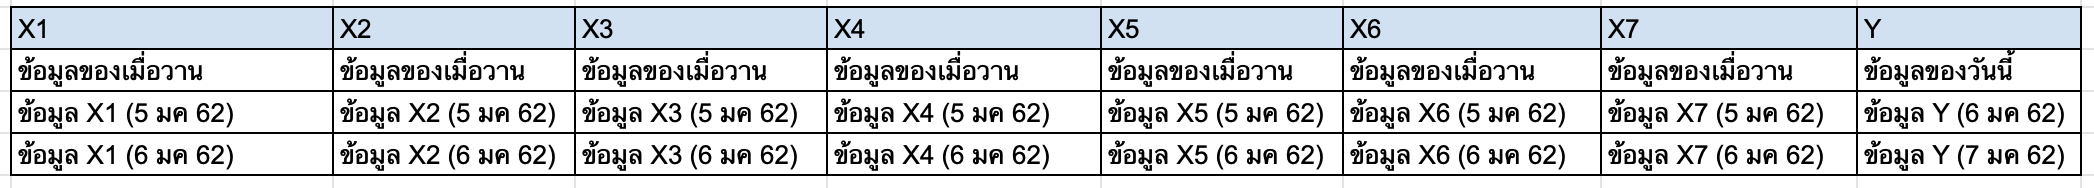



In [281]:
weather_data = pd.read_csv('/content/drive/MyDrive/bsc_DPDM_data/group_quiz.csv')
weather_data.head()

,จังหวัด,วัน,เดือน,ปี,ความกด,ความชื้น,อุณหภูมิตุ้มแห้ง,อุณหภูมิจุดน้ำค้าง,อุณหภูมิตำ่สุด,จำนวนเมฆ,ปริมาณฝน,ความเร็วลม,date
0,ขอนแก่น,1,10,2011,1005.47,83,27.6,24.2,24.8,9,1.4,3,2011-10-01
1,ขอนแก่น,2,10,2011,1006.65,92,25.6,24.0,23.0,10,17.7,2,2011-10-02
2,ขอนแก่น,3,10,2011,1007.49,86,25.6,22.9,22.1,10,3,3,2011-10-03
3,ขอนแก่น,4,10,2011,1008.28,80,25.8,21.9,22.8,8,0,2,2011-10-04
4,ขอนแก่น,5,10,2011,1009.88,86,24.3,21.7,23.1,10,2.2,2,2011-10-05
